# Algorytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import treelib
import random
import pandas as pd
import matplotlib.pyplot as plt
import random
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_example_1():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

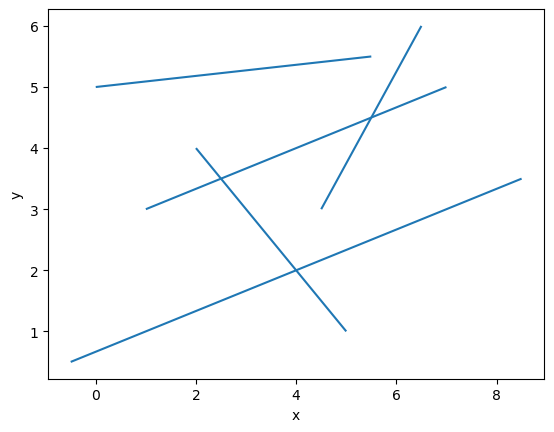

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

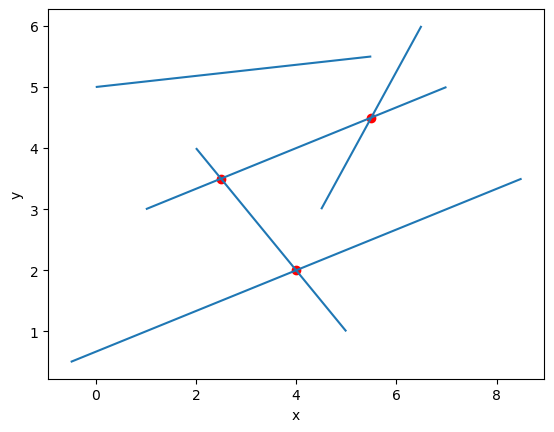

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
def det_3x3(a, b, c):
    return (c[1]-b[1])*(b[0]-a[0])-(c[0]-b[0])*(b[1]-a[1])

def generate_uniform_sections(max_x, max_y, n):
    points = []
    for i in range(n):
        x1, y1 = random.random() * max_x, random.random() * max_y
        x2, y2 = random.random() * max_x, random.random() * max_y
        if(x1 <= x2):
            P1, P2 = (x1, y1), (x2, y2)
        else:
            P1, P2 = (x2, y2), (x1, y1)
        if(x1 == x2):
            continue
        flag = False
        for j in range(len(points)):
            L1, L2 = points[j][0], points[j][1]
            if(L1[0] == x1 or L2[0] == x1 or L1[0] == x2 or L2[0] == x2):
                flag = True
                break
            if(det_3x3(P1, P2, L1) == 0 and det_3x3(P1, P2, L2) == 0):
                if(P1[0] < L1[0] < P2[0] or P1[0] < L2[0] < P2[0] or L1[0] < P1[0] < L2[0] or L1[0] < P2[0] < L2[0]):
                    flag  = True
                    break
        if(not flag):
            points.append((P1, P2))
    return points
    
    raise Exception("Unimplemented")

In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 21.250s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [7]:
# section = ...

Zwizualizuj otrzymane odcinki

In [8]:
# ...

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

Uzupełnij funkcję ```is_intersection```


WYNIKI DLA BRUTA:
( 1.586 1.437 )
( 2.292 0.101 )
( 2.526 2.317 )



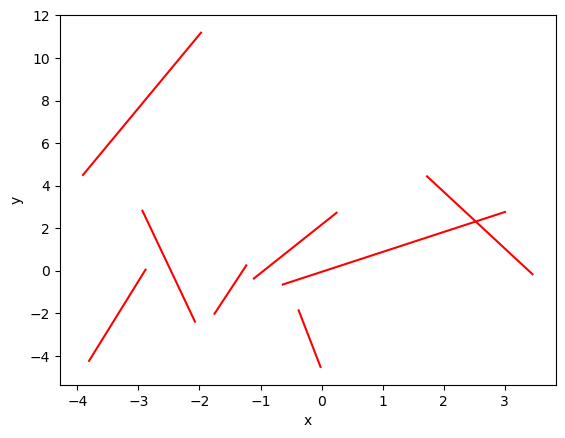

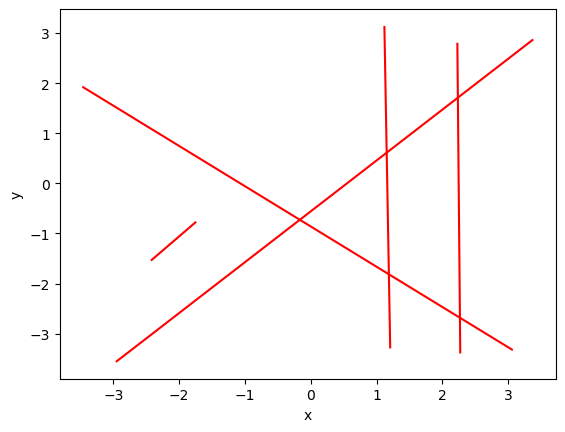

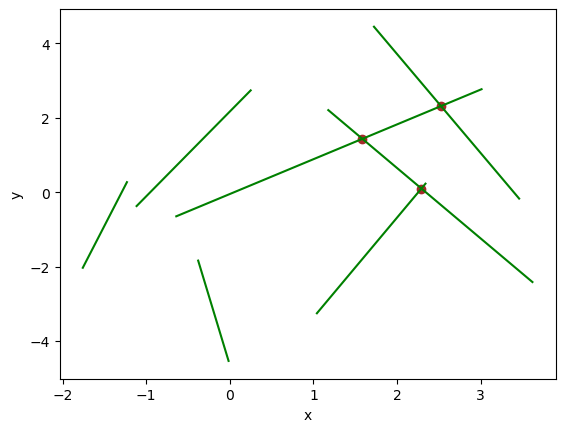

In [10]:
def check_intersection(sect1, sect2):
    if(det_3x3(sect1[0], sect1[1], sect2[0]) * det_3x3(sect1[0], sect1[1], sect2[1]) > 0):
        return False
    if(det_3x3(sect2[0], sect2[1], sect1[0]) * det_3x3(sect2[0], sect2[1], sect1[1]) <= 0):
        return True
    return False

def calculate_ab(P1, P2):
    x1, y1 = P1[0], P1[1]
    x2, y2 = P2[0], P2[1]
    a = (y1 - y2)/(x1-x2)
    b = y2 - a * x2
    return [a, b]

def find_interpoint(sect1, sect2):
    a1, b1 = calculate_ab(sect1[0], sect1[1])
    a2, b2 = calculate_ab(sect2[0], sect2[1])
    x = -(b1-b2)/(a1-a2)
    y = a1 * x + b1
    return [x, y]
def intersections_brut(sections):
    vis1 = Visualizer()
    vis1.add_line_segment(sections, color = "green")
    n = len(sections)
    interpoints = []
    for i in range(n):
        for j in range(i+1, n, 1):
            if(check_intersection(sections[i], sections[j])):
                x, y = find_interpoint(sections[i], sections[j])
                interpoints.append((x, y))
    vis1.add_point(interpoints, color = "brown")
    vis1.show()
    interpoints.sort()
    print("\nWYNIKI DLA BRUTA:")
    for i in range(len(interpoints)):
        print('(', round(interpoints[i][0], 3), round(interpoints[i][1], 3), ')')
    print()

def is_intersection(sections):
    n = len(sections)
    for i in range(n):
        for j in range(i+1, n, 1):
            if(check_intersection(sections[i], sections[j])):
                return True
    return False

def display():
    k = 100.0
    res = [((0.030224161896051163*k, 0.02781048251736548*k), (-0.0065099067313998255*k, -0.0065645174826345215*k)),
    ((0.002589357974482537*k, 0.027588708323817088*k), (-0.011228043986301783*k, -0.003903227160053882*k)),
    ((-0.0294265733980665*k, 0.028697579291559028*k), (-0.020664318496105713*k, -0.024306452966505486*k)),
    ((-0.0122390733980665*k, 0.002971772839946124*k),(-0.017631230260811592*k, -0.020536291676182906*k)),
    ((0.0234839658176198*k, 0.002528224452849351*k), (0.010340583464678615*k, -0.0327338723213442*k)),
    ((-0.02875255379022336*k, 0.0009758050980106375*k), (-0.03818882830002729*k, -0.04271371103102162*k)),
    ((-0.003813828300027272*k, -0.018096775547150654*k), (-0.00010672045689001652*k, -0.04559677554715065*k)),
    ((0.036290338366639405*k, -0.024306452966505486*k), (0.011688622680364885*k, 0.02226612767865581*k)),
    ((-0.03919985771179199*k, 0.044665321227042906*k), (-0.01965328908434101*k, 0.11223*k))]
    
    res_new = [((0.017165321227042896*k, 0.04471558346467863*k), (0.034685482517365494547596725763001*k, -0.0019072594181183955*k)),
    ((0.030224161896051163*k, 0.02781048251736548*k), (-0.0065099067313998255*k, -0.0065645174826345215*k)),
    ((0.002589357974482537*k, 0.027588708323817088*k), (-0.011228043986301783*k, -0.003903227160053882*k)),
    ((-0.0294265733980665*k, 0.028697579291559028*k), (-0.020664318496105713*k, -0.024306452966505486*k)),
    ((-0.0122390733980665*k, 0.002971772839946124*k),(-0.017631230260811592*k, -0.020536291676182906*k)),
    ((-0.02875255379022336*k, 0.0009758050980106375*k), (-0.03818882830002729*k, -0.04271371103102162*k)),
    ((-0.003813828300027272*k, -0.018096775547150654*k), (-0.00010672045689001652*k, -0.04559677554715065*k)),
    ((-0.03919985771179199*k, 0.044665321227042906*k), (-0.01965328908434101*k, 0.11223*k))]
    
    
    vis3 = Visualizer()
    vis3.add_line_segment(res_new, color = "red")
    vis3.show()
    
    vis2 = Visualizer()
    
    chosen = [((0.2589357974482537, 2.7588708323817088), (-1.1228043986301783, -0.3903227160053882)),
    ((3.0224161896051163, 2.781048251736548), (-0.65099067313998255, -0.65645174826345215)),
    ((-0.3813828300027272, -1.8096775547150654), (-0.010672045689001652, -4.559677554715065)),
    ((2.34839658176198, 0.2528224452849351), (1.0340583464678615, -3.27338723213442)),
    ((3.6290338366639405, -2.4306452966505486), (1.1688622680364885, 2.226612767865581)),
    ((1.7165321227042896, 4.471558346467863), (3.4685482517365494547596725763001, -0.19072594181183955)),
    ((-1.22390733980665, 0.2971772839946124),(-1.7631230260811592, -2.0536291676182906))]
    
    testowe2= [((-0.034729840063279685*k, 0.019299425704806472*k), (0.030693547033494514*k, -0.03327410370695825*k)),
    ((-0.02962903361166678*k, -0.03563317233440923*k), (0.03379838574317193*k, 0.028735700214610402*k)),
    ((0.01117741800123645*k, 0.031431778645982955*k), (0.012064514775429996*k, -0.032937093903036674*k)),
    ((0.02226612767865581*k, 0.028061680606767267*k), (0.022709676065752582*k, -0.03394812331480138*k)),
    ((-0.024306452966505486*k, -0.015412584099115098*k), (-0.017431452966505487*k, -0.007661358608919019*k))]
    vis2.add_line_segment(testowe2, color = "red")
    vis2.show()
    intersections_brut(chosen)
    
        
    
"""
7
0.2589357974482537
2.7588708323817088
-1.1228043986301783
-0.3903227160053882
3.0224161896051163
2.781048251736548
-0.65099067313998255
-0.65645174826345215
-0.3813828300027272
-1.8096775547150654
-0.010672045689001652
-4.559677554715065
2.34839658176198
0.2528224452849351
1.0340583464678615
-3.27338723213442
3.6290338366639405
-2.4306452966505486
1.1688622680364885
2.226612767865581
1.7165321227042896
4.471558346467863
3.4685482517365494547596725763001
-0.19072594181183955
-1.22390733980665
0.2971772839946124
-1.7631230260811592
-2.0536291676182906


5
-0.034729840063279685
0.019299425704806472
0.030693547033494514
-0.03327410370695825
-0.02962903361166678
-0.03563317233440923
0.03379838574317193
0.028735700214610402
0.01117741800123645
0.031431778645982955
0.012064514775429996
-0.032937093903036674
0.02226612767865581
0.028061680606767267
0.022709676065752582
-0.03394812331480138
-0.024306452966505486
-0.015412584099115098
-0.017431452966505487
-0.007661358608919019


((-38.289,14.648) (-1.162,4.631))
((-22.788,16.197) (-12.669,5.849))
((-47.133,3.695) (-34.829,14.799))
((-32.174,46.281) (-23.003,19.706))
((-41.907,17.394) (-13.926,13.899))
((-44.83,14.002) (-12.943,21.295))
((-45.743,14.003) (-7.922,18.353))
((-48.552,23.056) (-30.368,18.333))


"""
    
    
display()
    


In [11]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [12]:
def is_intersection_with_visualization(sections): # TODO wizualizacja (jak?)
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")

Uzupełnij funkcję ```find_intersections```

In [13]:
def find_intersections(sections, wypisz = False, borders = False):
    
    vis1 = Visualizer()
    for i in range(len(sections)):
        #x1, y1, x2, y2 = sections[i][0][0] * 100, sections[i][0][1] * 100, sections[i][1][0] * 100, sections[i][1][1] * 100
        x1, y1 = sections[i][0]
        x2, y2 = sections[i][1]
        vis1.add_line_segment(((x1, y1), (x2, y2)), color = "blue")
    
    
    flag = False
    class Point:
        def __init__(self, x, y, s, t):
            self.x, self.y, self.s, self.t = x, y, s, t
        def comp(self, other, x):
            return self.x < other.x
        def show(self):
            arg = "(" + str(round(self.x, 3)) + "," + str(round(self.y, 3)) + ")" 
            return arg
        def maxi(self, other, x):
            if(self.x > other.x):
                return self
            return other
        def mini(self, other, x):
            if (self.x < other.x):
                return self
            return other
        def equals(self, other, x):
            return (self.x == other.x and self.y == other.y)

    def abs(a):
        if (a < 0.0):
            return -a
        return a

    eps = 1e-12
    
    def calculate_ab(P1, P2):
        x1, y1 = P1.x, P1.y
        x2, y2 = P2.x, P2.y
        a = (y1 - y2)/(x1-x2)
        b = y2 - a * x2
        return [a, b]


    class line:
        def __init__(self, pp, pk, ind):
            self.pp, self.pk, self.ind = pp, pk, ind
            self.a, self.b = calculate_ab(pp, pk)
        def show(self):
            arg = self.pp.show() + " -> " + self.pk.show() #+ " y = " + str(round(self.a, 3)) + " * x + " + str(round(self.b, 3))
            return arg
        def comp(self, other, x):
            y1, y2 = self.a * x + self.b, other.a * x + other.b
            return (y1 < y2)
        def maxi(self, other, x):
            if (self.a * x + self.b > other.a * x + other.b):
                return self
            return other
        def mini(self, other, x):
            if (self.a * x + self.b < other.a * x + other.b):
                return self
            return other
        def equals(self, other, x):
            y1, y2 = self.a * x + self.b, other.a * x + other.b
            return (abs(y2-y1) <= eps)

    l_seg, param = [], []
    global res
    res, napisy = [], []

    class Node:
        def __init__(self, point):
            self.point = point
            self.l = None
            self.r = None


    def search(bst, key, x):
        if (bst == None):
            return bst
        temp = bst.point
        if(flag):
            pass
        if(bst.point.equals(key, x)):
            return bst
        if (bst.point.comp(key, x)):
            return search(bst.r, key, x)
        return search(bst.l, key, x)


    def insert(bst, key, x):
        if (bst == None):
            return
        if (bst.point.comp(key, x)):
            if (bst.r == None):
                bst.r = Node(key)
            else:
                insert(bst.r, key, x)
        else:
            if (bst.l == None):
                bst.l = Node(key)
            else:
                insert(bst.l, key, x)


    def find_next(bst, key, act_next, x):
        if (bst == None):
            return act_next
        if (not bst.point.comp(key, x) and not bst.point.equals(key, x)):
            act_next = act_next.mini(bst.point, x)
            return find_next(bst.l, key, act_next, x)
        return find_next(bst.r, key, act_next, x)


    def find_prev(bst, key, act_prev, x):
        if (bst == None):
            return act_prev
        if (not key.comp(bst.point, x) and not bst.point.equals(key, x)):
            act_prev = act_prev.maxi(bst.point, x)
            return find_prev(bst.r, key, act_prev, x)
        return find_prev(bst.l, key, act_prev, x)


    def remove_middle(bst, key, x):
        if (bst == None):
            return
        temp_left = bst.l
        temp_right = bst.r
        if (not bst.point.comp(key, x)):
            if (temp_left != None and key.equals(temp_left.point, x)):
                if (temp_left.r == None):
                    bst.l = temp_left.l
                else:
                    prev, temp = None, temp_left.r
                    if (temp.l == None):
                        temp_left.point = temp.point
                        temp_left.r = temp.r
                    else:
                        while (temp.l != None):
                            prev = temp
                            temp = temp.l
                        prev.l = temp.r
                        temp_left.point = temp.point
            else:
                remove_middle(temp_left, key, x)

        else:
            if (temp_right != None and key.equals(temp_right.point, x)):
                if (temp_right.r == None):
                    bst.r = temp_right.l
                else:
                    prev, temp = None, temp_right.r
                    if (temp.l == None):
                        temp_right.point = temp.point
                        temp_right.r = temp.r
                    else:
                        while (temp.l != None):
                            prev = temp
                            temp = temp.l
                        prev.l = temp.r
                        temp_right.point = temp.point
            else:
                remove_middle(temp_right, key, x)


    def remove_prepare(bst, key, x):
        if(bst == None):
            return bst
        if (bst.point.equals(key, x)):
            right = bst.r
            if (right == None):
                return bst.l
            copy = bst
            if (right.l == None):
                bst.point = right.point
                bst.r = right.r
            else:
                prev, temp = None, right
                while (temp.l != None):
                    prev = temp
                    temp = temp.l
                prev.l = temp.r
                bst.point = temp.point
            return bst
        remove_middle(bst, key, x)
        return bst


    def get_first(bst):
        while (bst.l != None):
            bst = bst.l
        return bst


    def get_last(bst):
        while (bst.r != None):
            bst = bst.r
        return bst


    def count_bst(bst):
        if(bst == None):
            return 0
        return 1 + count_bst(bst.l) + count_bst(bst.r)


    def show_bst(bst):
        if (bst == None):
            return
        print(bst.point.show())
        left, right = None, None
        if (bst.l != None):
            left = bst.l.point.show()
        if (bst.r != None):
            right = bst.r.point.show()
        print("l:", left, "r:", right)
        show_bst(bst.l)
        show_bst(bst.r)


    def det_3x3(a, b, c):
        return (c.y - b.y) * (b.x - a.x) - (c.x - b.x) * (b.y - a.y)


    def check_intersection(sect1, sect2):
        if (det_3x3(sect1.pp, sect1.pk, sect2.pp) * det_3x3(sect1.pp, sect1.pk, sect2.pk) > 0):
            return False
        if (det_3x3(sect2.pp, sect2.pk, sect1.pp) * det_3x3(sect2.pp, sect2.pk, sect1.pk) <= 0):
            return True
        return False


    def find_interpoint(l1, l2):
        a1, b1 = l1.a, l1.b
        a2, b2 = l2.a, l2.b
        x = -(b1-b2)/(a1-a2)
        y = a1 * x + b1
        return [x, y]
    
    def add_result(x, y, ind1, ind2):
        if(ind1 > ind2):
            temp = ind1
            ind1 = ind2
            ind2 = temp
        #x1, y1 = x/100, y/100
        ind1, ind2 = ind1 + 1, ind2 + 1
        res.append([(x1, y1), ind1, ind2])
        arg = str(x1) + ' ' + str(y1) + ' ' + str(ind1) + ' ' + str(ind2)
        napisy.append(arg)

    def generate_neutral():
        p1, p2 = Point(0, 0, -1, -1), Point(1, 2, -1 , -1)
        counter = 2 * n
        neutr_max = line(p1, p2, 2)
        neutr_max.a, neutr_max.b = 1, float('inf')
        neutr_min = line(p1, p2, 2)
        neutr_min.a, neutr_min.b = 1, -float('inf')
        return neutr_max, neutr_min

    def create_copy(obj):
        x1, y1, x2, y2, a, b, ind = obj.pp.x, obj.pp.y, obj.pk.x, obj.pk.y, obj.a, obj.b, obj.ind
        kopia = line(Point(x1, y1, -1, -1), Point(x2, y2, -1, -1), ind)
        kopia.a, kopia.b = a, b
        return kopia

    def flip(bst_state, bst_events, ind1, ind2, x_test):
        epsilon = 1e-10
        xup, xdown = x_test + epsilon, x_test - epsilon
        a1, b1 = param[ind1]
        a2, b2 = param[ind2]
        test1, test2 = create_copy(l_seg[ind1]), create_copy(l_seg[ind2])
        flag = True
        got1 = search(bst_state, test1, xdown)
        got2 = search(bst_state, test2, xdown)
        flag = False
        temp1, temp2 = create_copy(got1.point), create_copy(got2.point)
        got2.point, got1.point = temp1, temp2
        neutr_max, neutr_min = generate_neutral()
        y1, y2 = test1.a * xup + test1.b, test2.a * xup + test2.b
        change = 0
        if(y1 > y2): 
            temp1, temp2 = create_copy(test1), create_copy(test2)
            test1, test2 = temp2, temp1
            change = 1
        top = find_next(bst_state, test2, neutr_max, xup)
        bottom = find_prev(bst_state, test1, neutr_min, xup )
        if(top.b != float('inf')):
            if(not change):
                if(check_intersection(top, got1.point)): #bo zamiana miejscami
                    x, y = find_interpoint(top, got1.point)
                    if (search(bst_events, Point(x, y, None, None), 0) == None and (x > x_test or abs(x-x_test) <= eps)):
                        insert(bst_events, Point(x, y, top.ind, got1.point.ind), 0)
            else:
                if(check_intersection(top, got2.point)):
                    x, y = find_interpoint(top, got2.point)
                    if (search(bst_events, Point(x, y, None, None), 0) == None and (x > x_test or abs(x-x_test) <= eps)):
                        insert(bst_events, Point(x, y, top.ind, got2.point.ind), 0)
        if(bottom.b != -float('inf')):
            if (not change):
                if (check_intersection(bottom, got2.point)):
                    x, y = find_interpoint(bottom, got2.point)
                    if (search(bst_events, Point(x, y, None, None), 0) == None and (x > x_test or abs(x-x_test) <= eps)):
                        insert(bst_events, Point(x, y, bottom.ind, got2.point.ind), 0)
            else:
                if (check_intersection(bottom, got1.point)):
                    x, y = find_interpoint(bottom, got1.point)
                    if (search(bst_events, Point(x, y, None, None), 0) == None and (x > x_test or abs(x-x_test) <= eps)):
                        insert(bst_events, Point(x, y, bottom.ind, got1.point.ind), 0)




    def add_interpoint(bst_events, l1, l2, xt):
        global res
        if(check_intersection(l1, l2)):
            x, y = find_interpoint(l1, l2)
            if((x > xt or abs(x-xt) < eps) and search(bst_events, Point(x, y, None, None), 0) == None):
                insert(bst_events, Point(x, y, l1.ind, l2.ind), 0)

    def bst_to_list(bst):
        wyn = []
        def transform(bst):
            if(bst == None):
                return
            wyn.append(bst.point)
            if(bst.l != None):
                bst_to_list(bst.l)
            if(bst.r != None):
                bst_to_list(bst.r)
        transform(bst)
        for i in range(len(wyn)):
            print(wyn[i].show(), end = ' ')
        print()

        
    bst_points = None
    bst_lines = None
    max_y, min_y = -float('inf'), float('inf')
    n = len(sections)
    for i in range(n):
        x1, y1 = sections[i][0]
        x2, y2 = sections[i][1]
        max_y, min_y = max(max(y1, y2), max_y), min(min(y1, y2), min_y)
        if(x1 > x2):
            t1, t2 = x2, y2
            x2, y2 = x1, y1
            x1, y1 = t1, t2
        pp, pk = Point(x1, y1, None, None), Point(x2, y2, None, None)
        l_seg.append(line(pp, pk, i))
        param.append(calculate_ab(pp, pk))
        if(bst_points == None):
            bst_points = Node(Point(x1, y1, i, None))
        else:
            insert(bst_points, Point(x1, y1, i, None), 0)
        insert(bst_points, Point(x2, y2, None, i), 0)



    while(bst_points != None):
        act = get_first(bst_points)
        x1, y1, s, t = act.point.x, act.point.y, act.point.s, act.point.t
        bst_points = remove_prepare(bst_points, act.point, 0)
        if(t == None):
            if(bst_lines == None):
                bst_lines = Node(l_seg[s])
            else:
                kopia1 = create_copy(l_seg[s])
                insert(bst_lines, kopia1, x1)
                neutr_max, neutr_min = generate_neutral()
                next_ = find_next(bst_lines, kopia1, neutr_max, x1)
                if(next_.b != float('inf')):
                    add_interpoint(bst_points, kopia1, next_, x1 )
                prev_ = find_prev(bst_lines, kopia1, neutr_min, x1)
                if(prev_.b != -float('inf')):
                    add_interpoint(bst_points, kopia1, prev_, x1)
        elif(s == None):
            kopia2 = create_copy(l_seg[t])
            neutr_max, neutr_min = generate_neutral()
            next_ = find_next(bst_lines, kopia2, neutr_max, x1)
            prev_ = find_prev(bst_lines, kopia2, neutr_min, x1)
            if(next_.b != float('inf') and prev_.b != -float('inf')):
                add_interpoint(bst_points, next_, prev_, x1)
            bst_lines = remove_prepare(bst_lines, kopia2, x1)
        else:
            vis1.add_point((x1, y1), color = "red")
            if(borders):
                vis1.add_line_segment(((x1, min_y), (x1, max_y)), color = "purple")
            flip(bst_lines, bst_points, s, t, x1)
            add_result(x1, y1, s, t)

    if(wypisz):
        print("WYNIKI DLA BST:")
        for i in range(len(res)):
            print("(", round(res[i][0][0], 3), round(res[i][0][1], 3), ")")
    
    napisy.sort()
    vis1.show()
    return res
        
            
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    raise Exception("Unimplemented")

Lab 4, task 3:
	Test 1: WRONG ANSWER
		Output:   [[(-0.0016743790516658098, -0.007263586832941074), 1, 2], [(0.011526074740254208, 0.006132801296422352), 2, 3], [(0.011860591253227505, -0.018140143229495424), 1, 3], [(0.022344451130778698, 0.017111754849194583), 2, 4], [(0.022658670631229855, -0.026817363547212168), 1, 4]]
		Expected: ['-0.0016743790516658117 -0.007263586832941072 1 2', '0.011526074740254208 0.006132801296422439 2 3', '0.011860591253227505 -0.018140143229495424 1 3', '0.022344451130778698 0.01711175484919488 2 4', '0.022658670631229855 -0.026817363547212168 1 4']
	Test 2: Passed
	Test 3: Passed
Result: 2/3
Time: 0.062s


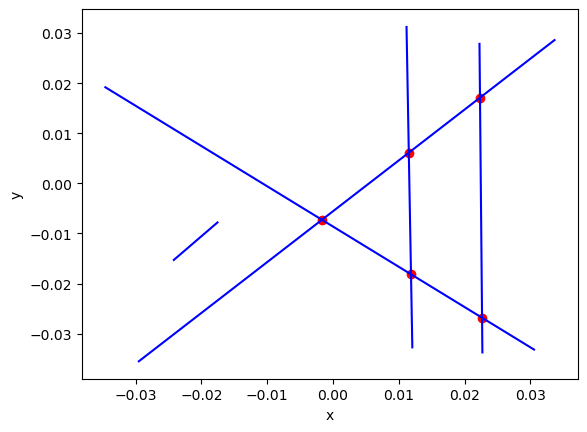

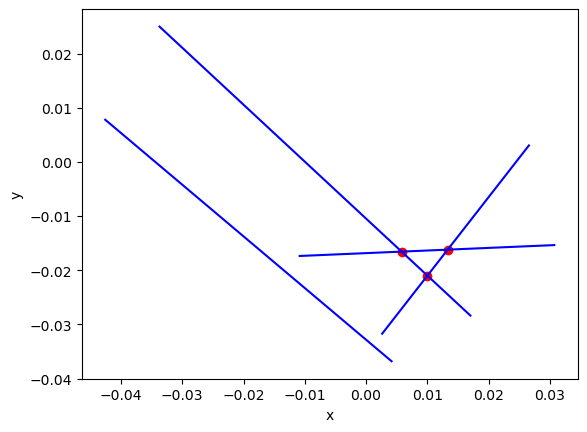

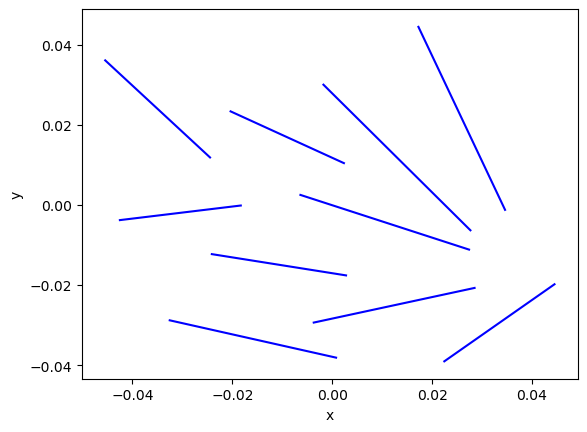

In [14]:
Test().runtest(3, find_intersections)

Uzupełnij funkcję ```find_intersections_with_visualization```

In [15]:

def find_intersections_with_visualization(sections):
    return
    # TODO wizualizacja (jak?)
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
def testuj(n, prec):
    arr = []
    temp = [((-38.289,14.648), (-1.162,4.631)),
    ((-22.788,16.197), (-12.669,5.849)),
    ((-47.133,3.695), (-34.829,14.799)),
    #((-32.174,46.281), (-23.003,19.706)),
    ((-41.907,17.394), (-13.926,13.899)),
    ((-44.83,14.002), (-12.943,21.295)),
    ((-45.743,14.003), (-7.922,18.353))]
    #((-48.552,23.056), (-30.368,18.333))]
    tab = generate_uniform_sections(-50.0, 50.0, n)
    
    temp2 = [((-39.719,40.782), (-11.324,0.371)),
    ((-31.459,23.105), (-22.536,26.129)),
    ((-49.127,21.568), (-14.762,1.302)),
    ((-40.722,18.239), (-3.537,14.4)),
    ((-33.61,43.236), (-4.162,14.207)),
    ((-15.509,9.095), (-14.427,30.44)),
    ((-15.559,23.017), (-4.769,17.593)),
    ((-33.942,44.58), (-27.517,48.341)),
    ((-29.911,8.773), (-25.693,41.167)),
    ((-33.823,27.647), (-29.681,0.658)),
    ((-49.478,35.943), (-21.21,33.84)),
    ((-18.34,11.556), (-5.102,3.345)),
    ((-43.919,6.427), (-39.237,46.72)),
    ((-26.867,34.823), (-7.037,3.694)),
    ((-47.495,30.212), (-46.817,5.419))]
    
    for i in range(len(tab)):
        x1, y1 = tab[i][0]
        x2, y2 = tab[i][1]
        x1, y1, x2, y2 = round(x1, prec), round(y1, prec), round(x2, prec), round(y2, prec)
        arr.append(((x1, y1), (x2, y2)))
        arg = "((" + str(x1) + "," + str(y1) + ')' + ", " + '(' + str(x2) + ',' + str(y2) + ")),"
        print(arg)
        
    intersections_brut(arr)    
    intersect = find_intersections(arr, True, False)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

((-33.97985,1.64647), (-30.28674,34.26892)),
((-23.55054,28.47518), (-2.54368,48.68788)),
((-39.4907,13.6906), (-8.7806,29.37425)),
((-21.19896,4.13174), (-18.69057,48.73874)),
((-47.40771,10.74746), (-30.5824,19.3612)),
((-43.02078,3.81155), (-34.21027,8.31115)),
((-25.2568,16.82428), (-14.81315,10.69274)),
((-14.59021,9.53687), (-1.27394,35.3021)),
((-19.32252,35.08888), (-6.15418,47.79007)),
((-27.22239,23.06036), (-17.90361,25.34726)),

WYNIKI DLA BRUTA:
( -32.195 17.417 )
( -32.06 18.605 )
( -20.638 14.112 )
( -20.105 23.591 )
( -20.035 24.824 )
( -19.617 32.26 )

WYNIKI DLA BST:
( -32.195 17.417 )
( -32.06 18.605 )
( -20.638 14.112 )
( -20.105 23.591 )
( -20.035 24.824 )
( -19.617 32.26 )


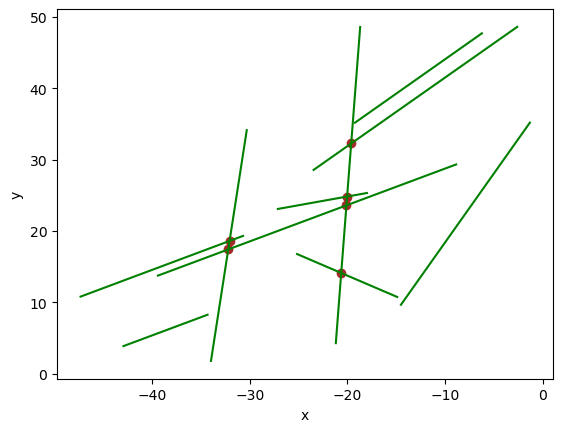

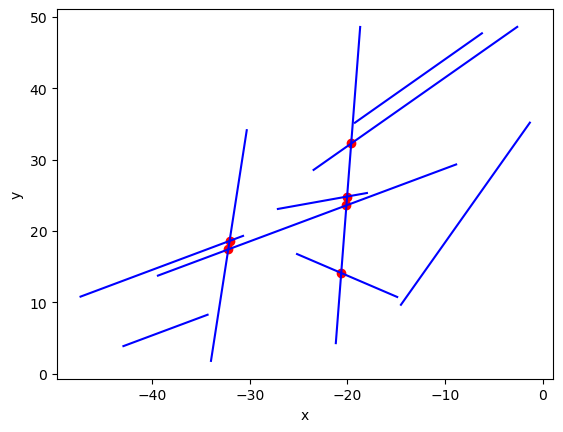

In [17]:
testuj(10, 5)


In [24]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.